In [1]:
import warnings
warnings.filterwarnings('ignore')
import importlib

import numpy as np
# import wlcstat.wlc_copoly as wlc_copoly
# import wlcstat.wlcstruc as wlcstruc

import sys
sys.path.append("./vertex_subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from scipy.interpolate import interp1d
from scipy import optimize

from gaus_vertex import *

pset=propagator.prop_set(nlam=10) 
wigset = wd.wigner_d_vals()

# redundant gamma 4 calcs??

In [ ]:
# ISSUES:
# cyl g4 mix introducing assymmetry (not same at FA = 0.6 as FA = 0.4). Investigate!! assumed too many sfs are equal
# gaus sf4 not equaling wlc sf4 for 2nd wavemode. INVESTIGATE!! THERE probably made assms abt ks being equal

In [ ]:
#look at second wavemode, and MIXED wavevectors

N = 10000
N_m = 1000
b = 1
M = 10
poly_type = "diblock"
FA = 0.4
n_p = 1

poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 

q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
q_star = q_star[0]

lam_q = q_star*np.array([1, 0, 0])
lam_q_2 = q_star*np.array([2, 0, 0])
    
Ks = np.array([lam_q, -lam_q, lam_q_2, -lam_q_2])
s4_g = calc_sf4(poly_mat, dens, N_m, b, Ks[0], Ks[1], Ks[2])
s4_wlc = s4wlc(pset, wigset, N, FA, Ks, sequence='all')

In [ ]:
s4_g

In [ ]:
s4_wlc

In [ ]:
poly_mat

In [ ]:
#potential issue of assymmetry: assuming too many strucutre factors are equal. 

In [ ]:
# N = 10000
# N_m = 1000
# b = 1
# M = 10
# poly_type = "diblock"
# n_p = 1

# FA = 0.4
# fa_array = [0.4, 0.6]
# chi_array = np.array([11.])/N

# for FA in fa_array:
#     print("----------------------------------------------------------------------")
#     print("FA:", FA)
#     poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    
#     q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
#     q_star = q_star[0]
    
#     lam_q = q_star*np.array([1, 0, 0])
#     lam_q_2 = q_star*np.array([2, 0, 0])
    
#     print("entering s4")
#     s4 = calc_sf4_TESTER(poly_mat, dens, N_m, b, [lam_q], [-lam_q], [lam_q_2])
# #     s4 = calc_sf4(poly_mat, dens, N_m, b, [lam_q], [-lam_q], [lam_q])

#     print("exited s4")
#     print("s4", s4)
#     print("s4.rot", np.flip(s4))

In [ ]:
# N = 10000
# N_m = 1000
# b = 1
# M = 10
# poly_type = "diblock"
# n_p = 1

# FA = 0.4
# fa_array = [0.4, 0.6]
# chi_array = np.array([11.])/N

# for FA in fa_array:
#     print("----------------------------------------------------------------------")
#     print("FA:", FA)
#     poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    
#     q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
#     q_star = q_star[0]
    
#     lam_q = q_star*np.array([1, 0, 0])
#     lam_q_2 = q_star*np.array([2, 0, 0])
    
#     print("entering lam_g4")
#     lam_g4 = (1/24) * (6) * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
#     print("exited lam_g4")
#     print("lam_g4", lam_g4)

In [ ]:
N = 10000
N_m = 1000
b = 1
M = 10
poly_type = "diblock"
n_p = 1

FA = 0.4
fa_array = [0.4, 0.6]
chi_array = np.array([11.])/N

for FA in fa_array:
    print("----------------------------------------------------------------------")
    print("FA:", FA)
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    
    q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
    q_star = q_star[0]
    print(q_star)
    
    lam_q = q_star*np.array([1, 0, 0])
    lam_q_2 = q_star*np.array([2, 0, 0])
    
    print("entering lam_g4_mix")
    lam_g4_mix = (1/24) * 24  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2])) #used to be 24
    print("exited lam_g4_mix")
    print("lam_g4_mix", lam_g4_mix)

In [26]:
%%time
# Gaus two harmonics

N = 10000

# fa_array = [0.3, 0.325, 0.35, 0.375, 0.3875, 0.4, 0.4125, 0.425, 0.4375, 0.45, 0.475, 0.5]#[0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45]####np.arange(0.2, 0.51, .02)
chi_array = np.arange(10, 13.01, 0.01)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N

N_m = 1000
b = 1
M = 10

fa_array = [0.3, 0.4, 0.5, 0.6, 0.7]
poly_type = "diblock"
n_p = 1


# fa_array = [0.4, 0.6]
# chi_array = np.array([11.5])/N

dis_pnts = np.array([])
lam_pnts = np.array([])
cyl_pnts = np.array([])
gyr_pnts = np.array([])
# bcc_pnts = np.array([])
# sq_cyl_pnts = np.array([])
# sim_cub_pnts = np.array([])
# fcc_pnts = np.array([])

for FA in fa_array:
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    
    q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    lam_q_2 = q_star*np.array([2, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
    cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
    cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
    cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])
    
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])
    
    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])
    
#     bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
#     bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
#     bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
#     bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
#     bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
#     bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

#     sq_cyl_q1 = q_star * np.array([1,0,0])
#     sq_cyl_q2 = q_star * np.array([0,1,0])
    
#     sim_cub_q1 = q_star * np.array([1,0,0])
#     sim_cub_q2 = q_star * np.array([0,1,0])
#     sim_cub_q3 = q_star * np.array([0,0,1])
    
#     fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
#     fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
#     fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
#     fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    lam_g3 = 0
    lam_g3_2 = 0
    lam_g3_mix = (1/6) * 6 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([lam_q, lam_q, -lam_q_2])) 
    print("----------------------------------------------------------------------")
    print("FA:", FA)
#     print("lam_g3_mix", lam_g3_mix)
    
    cyl_g3 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs)
#     print("cyl_g3", cyl_g3)
    cyl_g3_2 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs_2)
#     print("cyl_g3_2", cyl_g3_2)
    cyl_g3_mix = (1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))
#     print("cyl_g3_mix", cyl_g3_mix)
    
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = (1/6) * (1/(12*np.sqrt(6))) *-72 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q4, -gyr_q3_2]))
#     print("gyr_g3_mix", gyr_g3_mix)

    
    lam_g4 = (1/24) * (6) * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4_2 = (1/24) * (6)  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
    lam_g4_mix = (1/24) * 24  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2])) #used to be 24
#     print("lam_g4_2", lam_g4_2)
#     print("lam_g4_mix", lam_g4_mix)
    
    cyl_g4 = (1/24) * (1/9) *(18*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1 , -cyl_q1 , cyl_q1 , -cyl_q1 ])) + \
              72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
#     print("cyl_g4", cyl_g4)
    cyl_g4_2 = (1/24) * (1/9) * (18*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
              72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2]))) 
#     print("cyl_g4_2", cyl_g4_2)

# MILNER
    cyl_g4_mix1 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
                           3*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
                           2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))
#     print("cyl_g4_mix1", cyl_g4_mix1)
    cyl_g4_mix2 = (1/3) * gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))
#     print("cyl_g4_mix2", cyl_g4_mix2)

# MINE
#     cyl_g4_mix1 = -(1/24) * (1/9) * (144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
#                        72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
#                        144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))

#     cyl_g4_mix2 = -(1/24) * (1/9) * 144 * gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))

    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q1, -gyr_q1])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))
#     print("gyr_g4_mix1", gyr_g4_mix1)

#     # MILNER g4_mix2
#     gyr_g4_mix2 = (1/24) * (1/(12*6)) * (1152*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                                                                 -576*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                                                                 -576*gamma4(pset, wigset, N, FA, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
    
    gyr_g4_mix2 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9]))) 
#     print("gyr_g4_mix2", gyr_g4_mix2)
    # Mine
#     gyr_g4_mix2 = (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                                                                 -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                                                                 -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
 
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)                
        lam_g2_2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, 2*q_star, CHI)                 
        
        cyl_g2 = lam_g2
        cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(3)*q_star, CHI) 

        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(4/3)*q_star, CHI) 
        
#         print(cyl_g2, cyl_g3, cyl_g3_2, cyl_g3_mix, cyl_g4, cyl_g2_2,  cyl_g4_2, cyl_g4_mix1, cyl_g4_mix2)
#         print("lam")
#         print(lam_g2, lam_g3, lam_g4, lam_g2_2, lam_g4_2, lam_g3_mix, lam_g4_mix)

#         print(cyl_g3_mix)
        if cyl_g3<0:
            cyl_g3*= -1
        if cyl_g3_2<0:
            cyl_g3_2*= -1
        if cyl_g3_mix<0:
            cyl_g3_mix*= -1
            
        if gyr_g3<0:
            gyr_g3*= -1
        if gyr_g3_2<0:
            gyr_g3_2*= -1
        if gyr_g3_mix<0:
            gyr_g3_mix*= -1
            
        amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
                                                        amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
                                                        amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
                              [1,1], disp=False)
        
        amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
                                                 amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
                                                 amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * cyl_g4_mix2), \
                              [1,1], disp=False)
        
        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [1,1], disp=False)

        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
                amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
                amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix
        
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
                amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
                amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
                amp_c1**3 * amp_c2 * cyl_g4_mix2
        
        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2

#         print(cylF, lamF, gyrF)
        point = np.array([FA, CHI*N])
#         print(gyrF)
#         gyrF = 1e20
#         cylF = 1e20
#         lamF = 1e20
        
        minF = min([lamF, cylF, gyrF])# bccF, sq_cylF, sim_cubF, fccF])

        if minF > 0:
            phase_name = "dis"
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            phase_name = "lam" 
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            phase_name = "cyl"
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
#         elif minF == bccF:
#             phase_name = "bcc"
#         elif minF == sq_cylF:
#             phase_name = "sqcyl"
#         elif minF == sim_cubF:
#             phase_name = "simcub"
#         elif minF == fccF:
#             phase_name = "fcc"
        else:
            raise Exception("error in min F phase assignment")

#         print("cyl_g2", cyl_g2)
#         print("cyl_g2_2", cyl_g2_2)
    print("one FA done!!")

----------------------------------------------------------------------
FA: 0.3
one FA done!!
----------------------------------------------------------------------
FA: 0.4
one FA done!!
----------------------------------------------------------------------
FA: 0.5
one FA done!!
----------------------------------------------------------------------
FA: 0.6
one FA done!!
----------------------------------------------------------------------
FA: 0.7
one FA done!!
Wall time: 29.5 s


In [27]:
gyr_pnts

array([ 0.4 , 12.34,  0.4 , 12.35,  0.4 , 12.36,  0.4 , 12.37,  0.4 ,
       12.38,  0.4 , 12.39,  0.4 , 12.4 ,  0.4 , 12.41,  0.4 , 12.42,
        0.4 , 12.43,  0.4 , 12.44,  0.4 , 12.45,  0.4 , 12.46,  0.4 ,
       12.47,  0.4 , 12.48,  0.4 , 12.49,  0.4 , 12.5 ,  0.4 , 12.51,
        0.4 , 12.52,  0.4 , 12.53,  0.4 , 12.54,  0.4 , 12.55,  0.4 ,
       12.56,  0.4 , 12.57,  0.4 , 12.58,  0.4 , 12.59,  0.4 , 12.6 ,
        0.4 , 12.61,  0.4 , 12.62,  0.4 , 12.63,  0.4 , 12.64,  0.4 ,
       12.65,  0.4 , 12.66,  0.4 , 12.67,  0.4 , 12.68,  0.4 , 12.69,
        0.4 , 12.7 ,  0.4 , 12.71,  0.4 , 12.72,  0.4 , 12.73,  0.4 ,
       12.74,  0.4 , 12.75,  0.4 , 12.76,  0.4 , 12.77,  0.4 , 12.78,
        0.4 , 12.79,  0.4 , 12.8 ,  0.4 , 12.81,  0.4 , 12.82,  0.4 ,
       12.83,  0.4 , 12.84,  0.4 , 12.85,  0.4 , 12.86,  0.4 , 12.87,
        0.4 , 12.88,  0.4 , 12.89,  0.4 , 12.9 ,  0.4 , 12.91,  0.4 ,
       12.92,  0.4 , 12.93,  0.4 , 12.94,  0.4 , 12.95,  0.4 , 12.96,
        0.4 , 12.97,

Text(0.5, 1.0, 'diblock phase diagram, N = 10000')

<Figure size 432x288 with 0 Axes>

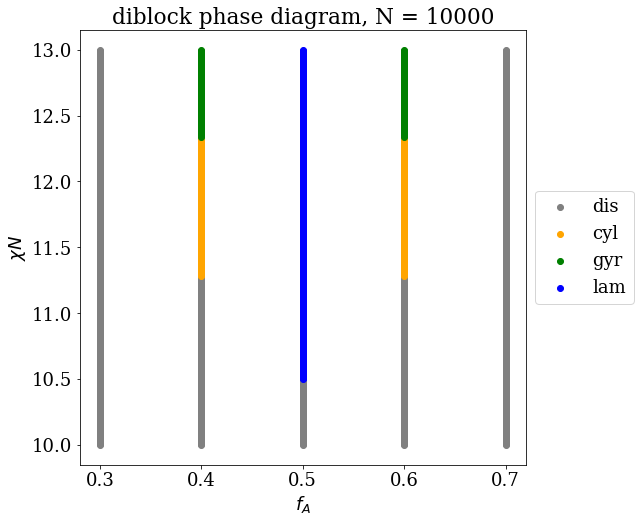

In [28]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
# ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

# ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
# ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
# ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")



# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")
ax.set_title("diblock phase diagram, N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
# ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

# ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
# ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
# ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")



# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")
ax.set_title("diblock phase diagram, N = " + str(N) )

In [ ]:
q_star

In [ ]:
%%time
# VERTEX TWO HARMONICS, including 1/root(n) factor for all, my gyr constants, all pos cyl FINAL FORM
N = 10000
# fa_array = [0.3, 0.325, 0.35, 0.375, 0.3875, 0.4, 0.4125, 0.425, 0.4375, 0.45, 0.475, 0.5]#[0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45]####np.arange(0.2, 0.51, .02)
chi_array = np.arange(10, 13.01, 0.1)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N
cyl_pnts = np.array([])
lam_pnts = np.array([])
gyr_pnts = np.array([])
dis_pnts = np.array([])

for FA in fa_array:
    KS = spinodal(pset, N, FA)
    q_star = KS[0]
    q_star = q_star
    
    lam_q = q_star*np.array([1, 0, 0])
    
    lam_q_2 = q_star*np.array([2, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
    cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
    cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
    cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])
    
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])
    
    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])
    
    
    lam_g3 = 0
    lam_g3_2 = 0
    lam_g3_mix = (1/6) * 6 * gamma3(pset, N, FA, np.array([lam_q, lam_q, -lam_q_2])) 
    
    cyl_g3 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3(pset, N, FA, cyl_qs)
    cyl_g3_2 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3(pset, N, FA, cyl_qs_2)
    cyl_g3_mix = (1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3(pset, N, FA, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))
    
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48 * gamma3(pset, N, FA, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = (1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3(pset, N, FA, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = (1/6) * (1/(12*np.sqrt(6))) *-72 * gamma3(pset, N, FA, np.array([gyr_q7, -gyr_q4, -gyr_q3_2]))
    
    lam_g4 = (1/24) * (6) * gamma4(pset, wigset, N, FA, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4_2 = (1/24) * (6)  * gamma4(pset, wigset, N, FA, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
    lam_g4_mix = (1/24) * 24  * gamma4(pset, wigset, N, FA, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2])) #used to be 24
    
    cyl_g4 = (1/24) * (1/9) *(18*gamma4(pset, wigset, N, FA, np.array([cyl_q1 , -cyl_q1 , cyl_q1 , -cyl_q1 ])) + \
              72*gamma4(pset, wigset, N, FA, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    cyl_g4_2 = (1/24) * (1/9) * (18*gamma4(pset, wigset, N, FA, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
              72*gamma4(pset, wigset, N, FA, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2])))
   
    #MILNER cyl
#     cyl_g4_mix1 = (1/3) * (2*gamma4(pset, wigset, N, FA, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
#                            3*gamma4(pset, wigset, N, FA, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
#                            2*gamma4(pset, wigset, N, FA, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))

#     cyl_g4_mix2 = (1/3) * gamma4(pset, wigset, N, FA, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))
    
    #MY cyl
    cyl_g4_mix1 = (1/24) * (1/9) * (144*gamma4(pset, wigset, N, FA, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
                       72*gamma4(pset, wigset, N, FA, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
                       144*gamma4(pset, wigset, N, FA, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))

    cyl_g4_mix2 = (1/24) * (1/9) * 144 * gamma4(pset, wigset, N, FA, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))

    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q1, gyr_q1, -gyr_q1])) + \
                       288*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4(pset, wigset, N, FA, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4(pset, wigset, N, FA, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4(pset, wigset, N, FA, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4(pset, wigset, N, FA, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4(pset, wigset, N, FA, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))
    
#     # MILNER g4_mix2
#     gyr_g4_mix2 = (1/24) * (1/(12*6)) * (1152*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                                                                 -576*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                                                                 -576*gamma4(pset, wigset, N, FA, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
    
#     gyr_g4_mix2 = (1/3) * (2*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                            -1*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                            -1*gamma4(pset, wigset, N, FA, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9])))  WRONG
    # MY g4_mix2
    gyr_g4_mix2 = (1/24) * (1/(12*np.sqrt(12)*np.sqrt(6))) * (1152*gamma4(pset, wigset, N, FA, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                                                                -576*gamma4(pset, wigset, N, FA, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                                                                -576*gamma4(pset, wigset, N, FA, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2(pset, N, FA, q_star, CHI)
        lam_g2_2 = (1/2) * 2 * (1) * gamma2(pset, N, FA, 2*q_star, CHI)                 
        
        cyl_g2 = (1/2) * (1/3) * 6  * gamma2(pset, N, FA, q_star, CHI) 
        cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2(pset, N, FA, np.sqrt(3)*q_star, CHI) 
        
        gyr_g2 = (1/2) * 24 * (1/12) * gamma2(pset, N, FA, q_star, CHI)
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2(pset, N, FA, np.sqrt(4/3)*q_star, CHI) 
        
        amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
                                                        amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
                                                        amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
                              [1,1], disp=False)
        
        amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
                                                 amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
                                                 amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * cyl_g4_mix2), \
                              [1,1], disp=False)
        
        amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              [1,1], disp=False)

        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
                amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
                amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix
        
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
                amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
                amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
                amp_c1**3 * amp_c2 * cyl_g4_mix2
#         cylF = 100000000000
        
        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
                amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
                amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
                amp_g1**3 * amp_g2 * gyr_g4_mix2
#         gyrF=1000000000
#         print("ampg:", amp_g1, amp_g2)
#         print("ampc:", amp_c1, amp_c2)
#         print("ampl:", amp_l1, amp_l2)
        
        point = np.array([FA, CHI*N])
        if (lamF > 0 and cylF > 0 and gyrF > 0):
            #disordered stable
            dis_pnts = np.append(dis_pnts, point)
        elif (lamF < cylF and lamF < gyrF):
            lam_pnts = np.append(lam_pnts, point) 
        elif (cylF < gyrF):
            cyl_pnts = np.append(cyl_pnts, point)
        else:
            gyr_pnts = np.append(gyr_pnts, point)
            
#         #for testing single phase
#         if (gyrF > 0):
#             dis_pnts = np.append(dis_pnts, point)
#         else:
#             gyr_pnts = np.append(gyr_pnts, point)
    print("one FA done!!")
            

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
# ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyr", color = "green")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

# ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
# ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
# ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")



# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")
ax.set_title("VERTEX diblock phase diagram, N = " + str(N) )

In [ ]:
def calc_sf4(poly_mat, dens, N_m, b, k_vec, k_vec_2, k_vec_3, plotting = False):
    M4_AAAA = calc_monomer_matrix_4(poly_mat, dens)
    M = np.shape(M4_AAAA)[0]
    nk = len(k_vec)
    N = M*N_m

    grid = np.indices((M,M,M,M))
    j1 = grid[0]
    j2 = grid[1]
    j3 = grid[2]
    j4 = grid[3]
    
    S4_AAAA_arr = np.zeros(nk)
    
    S4_BAAA_arr = np.zeros(nk)
    S4_ABAA_arr = np.zeros(nk)
    S4_AABA_arr = np.zeros(nk)
    S4_AAAB_arr = np.zeros(nk)
    
    S4_AABB_arr = np.zeros(nk)
    S4_BBAA_arr = np.zeros(nk)
    S4_ABBA_arr = np.zeros(nk)
    S4_BAAB_arr = np.zeros(nk)
    S4_ABAB_arr = np.zeros(nk)
    S4_BABA_arr = np.zeros(nk)

    S4_ABBB_arr = np.zeros(nk)
    S4_BABB_arr = np.zeros(nk)
    S4_BBAB_arr = np.zeros(nk)
    S4_BBBA_arr = np.zeros(nk)
    
    S4_BBBB_arr = np.zeros(nk)
    
    
    M4_BAAA = M4_AAAA[j2, j2, j3, j4] - M4_AAAA
    M4_BBAA = M4_BAAA[j1, j3, j3, j4] - M4_BAAA
    M4_BBBA = M4_BBAA[j1, j2, j4, j4] - M4_BBAA
    M4_BBBB = 1 - M4_AAAA[j1, j1, j1, j1] - M4_AAAA[j2, j2, j2, j2] - M4_AAAA[j3, j3, j3, j3]  + M4_AAAA[j1, j1, j3, j3]\
    + M4_AAAA[j2, j2, j3, j3] + M4_AAAA[j1, j1, j2, j2] - M4_AAAA[j1, j2, j3, j3] - M4_BBBA

    M4_ABAB = M4_AAAA[j1, j1, j3, j3] - M4_AAAA[j1, j1, j3, j4] - M4_AAAA[j1, j1, j2, j3] + M4_AAAA
    M4_ABBA = M4_AAAA[j1,j1,j4,j4] - M4_AAAA[j1, j1, j4, j3] - M4_AAAA[j1, j1, j2, j4] + M4_AAAA[j1, j2, j4, j3]
    M4_BBAB = M4_ABBA[j3, j2, j4, j3] - M4_ABBA[j1, j2, j4, j3]
    M4_BABB = M4_ABBA[j2, j4, j3, j2] - M4_ABBA[j1, j4, j3, j2]
    M4_ABBB = M4_ABBA[j1, j2, j3, j1] - M4_ABBA[j4, j2, j3, j1]
    
    M4_AAAB = M4_AAAA[j1, j2, j3, j3] - M4_AAAA
    M4_AABA = M4_AAAA[j1, j2, j2, j4] - M4_AAAA
    M4_ABAA = M4_AAAA[j1, j1, j3, j4] - M4_AAAA
    M4_AABB = M4_AABA[j1, j2, j3, j1] - M4_AABA
    M4_BAAB = M4_BAAA[j1, j2, j3, j3] - M4_BAAA
    M4_BABA = M4_BAAA[j1, j2, j2 ,j4] - M4_BAAA
    
    for i, k1 in enumerate(k_vec):
        k2 = k_vec_2[i]
        k3 = k_vec_3[i]
        k12 = k1 + k2
        k13 = k1 + k3
        k23 = k2 + k3
        k123 = k1 + k2 + k3
        
        # CASE 1; kA = k1 + k2 + k3; kB = k_1 + k_2; kC = k_1  S4 > S3 > S2 > S1 (and reverse). All cases on wlcstat
        case1 = [[k123, k12, k1], [j4, j3, j2, j1]]
        case2 = [[k123, k12, k2], [j4, j3, j1, j2]]
        case3 = [[k123, k13, k1], [j4, j2, j3, j1]]
        case4 = [[k123, k23, k2], [j4, j1, j3, j2]]
        case5 = [[k123, k13, k3], [j4, j2, j1, j3]]
        case6 = [[k123, k23, k3], [j4, j1, j2, j3]]
        case7 = [[-k3, k12, k1], [j3, j4, j2, j1]]
        case8 = [[-k3, k12, k2], [j3, j4, j1, j2]]
        case9 = [[-k2, k13, k1], [j2, j4, j3, j1]]
        case10 = [[-k1, k23, k2], [j1, j4, j3, j2]]
        case11 = [[-k2, k13, k3], [j2, j4, j1, j3]]
        case12 = [[-k1, k23, k3], [j1, j4, j2, j3]]
        
        case_arr = [case1, case2, case3, case4, case5, case6, \
                   case7, case8, case9, case10, case11, case12]
        
        # need to consider degenerate cases. flipping each element in array, then appending to original case array
        case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
        
#        for each case and sub case, add to a matrix C(j1, j2, j3, j4) which contains the contribution to the overall S4
#        then sum over all indices. Need to keep track of js so that aproiate multiplications with cross corr matrix M4 
        C = np.zeros((M,M,M,M))
        for cse in case_arr:
            kA, kB, kC = cse[0]
            ordered_js = cse[1]
            
            xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
            xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
            xm_C = (1/6) * N_m * b**2 * np.linalg.norm(kC)**2
            
            C = calc_case_s4(C, xm_A, xm_B, xm_C, ordered_js)
            
        S4_AAAA_arr[i] += np.sum((1/M**4) * M4_AAAA * C)*(N**4)
        
        S4_BAAA_arr[i] += np.sum((1/M**4) * M4_BAAA * C)*(N**4)
        S4_ABAA_arr[i] += np.sum((1/M**4) * M4_ABAA * C)*(N**4)
        S4_AABA_arr[i] += np.sum((1/M**4) * M4_AABA * C)*(N**4)
        S4_AAAB_arr[i] += np.sum((1/M**4) * M4_AAAB * C)*(N**4)

        S4_AABB_arr[i] += np.sum((1/M**4) * M4_AABB * C)*(N**4)        
        S4_BBAA_arr[i] += np.sum((1/M**4) * M4_BBAA * C)*(N**4)
        S4_ABBA_arr[i] += np.sum((1/M**4) * M4_ABBA * C)*(N**4)
        S4_BAAB_arr[i] += np.sum((1/M**4) * M4_BAAB * C)*(N**4)
        S4_ABAB_arr[i] += np.sum((1/M**4) * M4_ABAB * C)*(N**4)
        S4_BABA_arr[i] += np.sum((1/M**4) * M4_BABA * C)*(N**4)

        S4_ABBB_arr[i] += np.sum((1/M**4) * M4_ABBB * C)*(N**4)
        S4_BABB_arr[i] += np.sum((1/M**4) * M4_BABB * C)*(N**4)
        S4_BBAB_arr[i] += np.sum((1/M**4) * M4_BBAB * C)*(N**4)
        S4_BBBA_arr[i] += np.sum((1/M**4) * M4_BBBA * C)*(N**4)

        S4_BBBB_arr[i] += np.sum((1/M**4) * M4_BBBB * C)*(N**4)
        
        
    s4 = np.zeros((2, 2, 2, 2))
    
    s4[0][0][0][0] = S4_AAAA_arr[0]
    s4[0][0][0][1] = S4_AAAB_arr[0]
    s4[0][0][1][0] = S4_AABA_arr[0]
    s4[0][1][0][0] = S4_ABAA_arr[0]
    s4[1][0][0][0] = S4_BAAA_arr[0]
    s4[0][0][1][1] = S4_AABB_arr[0]
    s4[1][1][0][0] = S4_BBAA_arr[0]
    s4[1][0][0][1] = S4_BAAB_arr[0]
    s4[0][1][1][0] = S4_ABBA_arr[0]
    s4[1][0][1][0] = S4_BABA_arr[0]
    s4[0][1][0][1] = S4_ABAB_arr[0]
    s4[1][1][1][0] = S4_BBBA_arr[0]
    s4[1][1][0][1] = S4_BBAB_arr[0]
    s4[1][0][1][1] = S4_BABB_arr[0]
    s4[0][1][1][1] = S4_ABBB_arr[0]
    s4[1][1][1][1] = S4_BBBB_arr[0]
    
    if plotting: # matrix only contains single value, for calculating gamma functions
        return S4_AAAA_arr, S4_AAAB_arr, S4_AABA_arr, S4_ABAA_arr, S4_BAAA_arr, S4_AABB_arr, S4_BBAA_arr, S4_ABAB_arr, S4_BABA_arr, S4_ABBA_arr, S4_ABBB_arr, S4_BABB_arr, S4_BBAB_arr, S4_BBBA_arr, S4_BBBB_arr 
    
    return s4 